Ямнюк Аліна, КН-410

## **Data Manipulation**

In order to get anything done, we need some way to store and manipulate data. Generally, there are two important things we need to do with data: (i) acquire them; and (ii) process them once they are inside the computer. There is no point in acquiring data without some way to store it, so let us get our hands dirty first by playing with synthetic data. To start, we introduce the  𝑛 - dimensional array, which is also called the tensor.

If you have worked with NumPy, the most widely-used scientific computing package in Python, then you will find this section familiar. No matter which framework you use, its tensor class (ndarray in MXNet, Tensor in both PyTorch and TensorFlow) is similar to NumPy’s ndarray with a few killer features. First, GPU is well-supported to accelerate the computation whereas NumPy only supports CPU computation. Second, the tensor class supports automatic differentiation. These properties make the tensor class suitable for deep learning. Throughout the book, when we say tensors, we are referring to instances of the tensor class unless otherwise stated.

### **Getting** **Started**

In this section, we aim to get you up and running, equipping you with the basic math and numerical computing tools that you will build on as you progress through the book. Do not worry if you struggle to grok some of the mathematical concepts or library functions. The following sections will revisit this material in the context of practical examples and it will sink in. On the other hand, if you already have some background and want to go deeper into the mathematical content, just skip this section.

In [1]:
import torch

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel()

12

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.randn(3, 4)

tensor([[ 0.7798,  1.8056,  1.8577,  0.4676],
        [ 0.5006,  0.6591, -0.5079, -0.8976],
        [-0.2426, -0.1884, -0.4473, -1.3130]])

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### **Operations**

This book is not about software engineering. Our interests are not limited to simply reading and writing data from/to arrays. We want to perform mathematical operations on those arrays. Some of the simplest and most useful operations are the elementwise operations. These apply a standard scalar operation to each element of an array. For functions that take two arrays as inputs, elementwise operations apply some standard binary operator on each pair of corresponding elements from the two arrays. We can create an elementwise function from any function that maps from a scalar to a scalar.

In mathematical notation, we would denote such a unary scalar operator (taking one input) by the signature  𝑓:ℝ→ℝ . This just means that the function is mapping from any real number ( ℝ ) onto another. Likewise, we denote a binary scalar operator (taking two real inputs, and yielding one output) by the signature  𝑓:ℝ,ℝ→ℝ . Given any two vectors  𝐮  and  𝐯  of the same shape, and a binary operator  𝑓 , we can produce a vector  𝐜=𝐹(𝐮,𝐯)  by setting  𝑐𝑖←𝑓(𝑢𝑖,𝑣𝑖)  for all  𝑖 , where  𝑐𝑖,𝑢𝑖 , and  𝑣𝑖  are the  𝑖th  elements of vectors  𝐜,𝐮 , and  𝐯 . Here, we produced the vector-valued  𝐹:ℝ𝑑,ℝ𝑑→ℝ𝑑  by lifting the scalar function to an elementwise vector operation.

The common standard arithmetic operators (+, -, *, /, and **) have all been lifted to elementwise operations for any identically-shaped tensors of arbitrary shape. We can call elementwise operations on any two tensors of the same shape. In the following example, we use commas to formulate a 5-element tuple, where each element is the result of an elementwise operation.

In [10]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # The ** operator is exponentiation

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [11]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [12]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [13]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [14]:
X.sum()

tensor(66.)

### **Broadcasting Mechanism**

In the above section, we saw how to perform elementwise operations on two tensors of the same shape. Under certain conditions, even when shapes differ, we can still perform elementwise operations by invoking the broadcasting mechanism. This mechanism works in the following way: First, expand one or both arrays by copying elements appropriately so that after this transformation, the two tensors have the same shape. Second, carry out the elementwise operations on the resulting arrays.

In [15]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

In [16]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### **Indexing and Slicing**
Just as in any other Python array, elements in a tensor can be accessed by index. As in any Python array, the first element has index 0 and ranges are specified to include the first but before the last element. As in standard Python lists, we can access elements according to their relative position to the end of the list by using negative indices.

In [17]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]), tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [18]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [19]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### **Saving Memory**

Running operations can cause new memory to be allocated to host results. For example, if we write Y = X + Y, we will dereference the tensor that Y used to point to and instead point Y at the newly allocated memory. In the following example, we demonstrate this with Python’s id() function, which gives us the exact address of the referenced object in memory. After running Y = Y + X, we will find that id(Y) points to a different location. That is because Python first evaluates Y + X, allocating new memory for the result and then makes Y point to this new location in memory.

In [20]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [21]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140292626138032
id(Z): 140292626138032


In [22]:
before = id(X)
X += Y
id(X) == before

True

### **Conversion to Other Python Objects**

In [23]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [24]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## **Data Preprocessing**

So far we have introduced a variety of techniques for manipulating data that are already stored in tensors. To apply deep learning to solving real-world problems, we often begin with preprocessing raw data, rather than those nicely prepared data in the tensor format. Among popular data analytic tools in Python, the pandas package is commonly used. Like many other extension packages in the vast ecosystem of Python, pandas can work together with tensors. So, we will briefly walk through steps for preprocessing raw data with pandas and converting them into the tensor format. We will cover more data preprocessing techniques in later chapters.



### **Reading the Dataset**

In [25]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [26]:
# If pandas is not installed, just uncomment the following line:
# !pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### **Handling Missing Data**

Note that “NaN” entries are missing values. To handle missing data, typical methods include imputation and deletion, where imputation replaces missing values with substituted ones, while deletion ignores missing values. Here we will consider imputation.

In [27]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [28]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### **Conversion to the Tensor Format**



In [29]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## **Linear Algebra**

Now that you can store and manipulate data, let us briefly review the subset of basic linear algebra that you will need to understand and implement most of models covered in this book. Below, we introduce the basic mathematical objects, arithmetic, and operations in linear algebra, expressing each of them through mathematical notation and the corresponding implementation in code.

### **Scalars**

If you never studied linear algebra or machine learning, then your past experience with math probably consisted of thinking about one number at a time. And, if you ever balanced a checkbook or even paid for dinner at a restaurant then you already know how to do basic things like adding and multiplying pairs of numbers. For example, the temperature in Palo Alto is  52  degrees Fahrenheit. Formally, we call values consisting of just one numerical quantity scalars. If you wanted to convert this value to Celsius (the metric system’s more sensible temperature scale), you would evaluate the expression  𝑐 = 5/9(𝑓−32) , setting  𝑓 to 52 . In this equation, each of the terms — 5, 9, and  32 — are scalar values. The placeholders  𝑐  and  𝑓  are called variables and they represent unknown scalar values.

In this book, we adopt the mathematical notation where scalar variables are denoted by ordinary lower-cased letters (e.g.,  𝑥 ,  𝑦 , and  𝑧 ). We denote the space of all (continuous) real-valued scalars by  ℝ . For expedience, we will punt on rigorous definitions of what precisely space is, but just remember for now that the expression  𝑥∈ℝ  is a formal way to say that  𝑥  is a real-valued scalar. The symbol  ∈  can be pronounced “in” and simply denotes membership in a set. Analogously, we could write  𝑥, 𝑦 ∈ {0,1}  to state that  𝑥  and  𝑦  are numbers whose value can only be  0  or  1 .

A scalar is represented by a tensor with just one element. In the next snippet, we instantiate two scalars and perform some familiar arithmetic operations with them, namely addition, multiplication, division, and exponentiation.

In [30]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### **Vectors**

You can think of a vector as simply a list of scalar values. We call these values the elements (entries or components) of the vector. When our vectors represent examples from our dataset, their values hold some real-world significance. For example, if we were training a model to predict the risk that a loan defaults, we might associate each applicant with a vector whose components correspond to their income, length of employment, number of previous defaults, and other factors. If we were studying the risk of heart attacks hospital patients potentially face, we might represent each patient by a vector whose components capture their most recent vital signs, cholesterol levels, minutes of exercise per day, etc. In math notation, we will usually denote vectors as bold-faced, lower-cased letters (e.g.,  𝐱 ,  𝐲 , and  𝐳) .

In [31]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [32]:
x[3]

tensor(3)

In [33]:
len(x)

4

In [34]:
x.shape

torch.Size([4])

### **Matrices**

Just as vectors generalize scalars from order zero to order one, matrices generalize vectors from order one to order two. Matrices, which we will typically denote with bold-faced, capital letters (e.g.,  𝐗 ,  𝐘 , and  𝐙 ), are represented in code as tensors with two axes.

In math notation, we use  𝐀∈ℝ𝑚×𝑛  to express that the matrix  𝐀  consists of  𝑚  rows and  𝑛  columns of real-valued scalars. Visually, we can illustrate any matrix  𝐀∈ℝ𝑚×𝑛  as a table, where each element  𝑎𝑖𝑗  belongs to the  𝑖th  row and  𝑗th  column

In [35]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [36]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [37]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [38]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### **Tensors**

Just as vectors generalize scalars, and matrices generalize vectors, we can build data structures with even more axes. Tensors (“tensors” in this subsection refer to algebraic objects) give us a generic way of describing  𝑛 -dimensional arrays with an arbitrary number of axes. Vectors, for example, are first-order tensors, and matrices are second-order tensors.

In [39]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [40]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # Assign a copy of `A` to `B` by allocating new memory
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [41]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

### **Basic Properties of Tensor Arithmetic**

Scalars, vectors, matrices, and tensors (“tensors” in this subsection refer to algebraic objects) of an arbitrary number of axes have some nice properties that often come in handy. For example, you might have noticed from the definition of an elementwise operation that any elementwise unary operation does not change the shape of its operand. Similarly, given any two tensors with the same shape, the result of any binary elementwise operation will be a tensor of that same shape. For example, adding two matrices of the same shape performs elementwise addition over these two matrices.

In [42]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # Assign a copy of `A` to `B` by allocating new memory
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [43]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [44]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # Assign a copy of `A` to `B` by allocating new memory
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [45]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [46]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

### **Reduction**

One useful operation that we can perform with arbitrary tensors is to calculate the sum of their elements. In mathematical notation, we express sums using the  ∑  symbol. To express the sum of the elements in a vector  𝐱  of length  𝑑 , we write  ∑𝑑𝑖=1𝑥𝑖 . In code, we can just call the function for calculating the sum.

In [47]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [48]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [49]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [50]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [51]:
A.sum(axis=[0, 1])  # Same as `A.sum()`

tensor(190.)

In [52]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [53]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### **Non-Reduction Sum**

However, sometimes it can be useful to keep the number of axes unchanged when invoking the function for calculating the sum or mean.

In [54]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [55]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [56]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### **Dot Products**

So far, we have only performed elementwise operations, sums, and averages. And if this was all we could do, linear algebra probably would not deserve its own section. However, one of the most fundamental operations is the dot product. Given two vectors  𝐱,𝐲∈ℝ𝑑 , their dot product  𝐱⊤𝐲  (or  ⟨𝐱,𝐲⟩ ) is a sum over the products of the elements at the same position:  𝐱⊤𝐲=∑𝑑𝑖=1𝑥𝑖𝑦𝑖 .

In [57]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [58]:
torch.sum(x * y)

tensor(6.)

### **Matrix-Vector Products**

In [59]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### **Matrix-Matrix Multiplication**

In [60]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### **Norms**

Some of the most useful operators in linear algebra are norms. Informally, the norm of a vector tells us how big a vector is. The notion of size under consideration here concerns not dimensionality but rather the magnitude of the components.

In linear algebra, a vector norm is a function  𝑓  that maps a vector to a scalar, satisfying a handful of properties. Given any vector  𝐱 , the first property says that if we scale all the elements of a vector by a constant factor  𝛼 , its norm also scales by the absolute value of the same constant factor:

𝑓(𝛼𝐱)=|𝛼|𝑓(𝐱).
 
The second property is the familiar triangle inequality:

𝑓(𝐱+𝐲)≤𝑓(𝐱)+𝑓(𝐲).
 
The third property simply says that the norm must be non-negative:

𝑓(𝐱)≥0.
 
That makes sense, as in most contexts the smallest size for anything is 0. The final property requires that the smallest norm is achieved and only achieved by a vector consisting of all zeros.

∀𝑖,[𝐱]𝑖=0⇔𝑓(𝐱)=0.

In [61]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [62]:
torch.abs(u).sum()

tensor(7.)

In [63]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## **Calculus**

  Finding the area of a polygon had remained mysterious until at least 2,500 years ago, when ancient Greeks divided a polygon into triangles and summed their areas. To find the area of curved shapes, such as a circle, ancient Greeks inscribed polygons in such shapes.
  In deep learning, we train models, updating them successively so that they get better and better as they see more and more data. Usually, getting better means minimizing a loss function, a score that answers the question “how bad is our model?” This question is more subtle than it appears. Ultimately, what we really care about is producing a model that performs well on data that we have never seen before. But we can only fit the model to data that we can actually see. Thus we can decompose the task of fitting models into two key concerns: (i) optimization: the process of fitting our models to observed data; (ii) generalization: the mathematical principles and practitioners’ wisdom that guide as to how to produce models whose validity extends beyond the exact set of data examples used to train them.

### **Derivatives and Differentiation**

We begin by addressing the calculation of derivatives, a crucial step in nearly all deep learning optimization algorithms. In deep learning, we typically choose loss functions that are differentiable with respect to our model’s parameters. Put simply, this means that for each parameter, we can determine how rapidly the loss would increase or decrease, were we to increase or decrease that parameter by an infinitesimally small amount.

In [64]:
# !pip install -U d2l
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [65]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [66]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [67]:
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [68]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [69]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

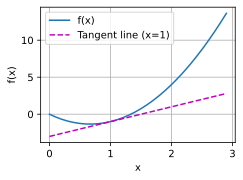

In [70]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### **Partial Derivatives**

So far we have dealt with the differentiation of functions of just one variable. In deep learning, functions often depend on many variables. Thus, we need to extend the ideas of differentiation to these multivariate functions.

Let y=f(x1,x2,…,xn)
be a function with n variables. The partial derivative of y with respect to its ith parameter xi

∂y∂xi=limh→0f(x1,…,xi−1,xi+h,xi+1,…,xn)−f(x1,…,xi,…,xn)h.

To calculate ∂y∂xi
, we can simply treat x1,…,xi−1,xi+1,…,xn as constants and calculate the derivative of y with respect to xi.

For notation of partial derivatives, the following are equivalent:
¶
∂y∂xi=∂f∂xi=fxi=fi=Dif=Dxif.

### **Gradients**

We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain the gradient vector of the function. Suppose that the input of function f:Rn→R is an n-dimensional vector x=[x1,x2,…,xn]⊤ and the output is a scalar. The gradient of the function f(x) with respect to x is a vector of n partial derivatives

### **Chain Rule**

However, such gradients can be hard to find. This is because multivariate functions in deep learning are often composite, so we may not apply any of the aforementioned rules to differentiate these functions. Fortunately, the chain rule enables us to differentiate composite functions.

### **Summary**

* Differential calculus and integral calculus are two branches of calculus, where the former can be applied to the ubiquitous optimization problems in deep learning.

* A derivative can be interpreted as the instantaneous rate of change of a function with respect to its variable. It is also the slope of the tangent line to the curve of the function.

* A gradient is a vector whose components are the partial derivatives of a multivariate function with respect to all its variables.

* The chain rule enables us to differentiate composite functions


## **Automatic Differentiation**

As we have explained, differentiation is a crucial step in nearly all deep learning optimization algorithms. While the calculations for taking these derivatives are straightforward, requiring only some basic calculus, for complex models, working out the updates by hand can be a pain (and often error-prone).

Deep learning frameworks expedite this work by automatically calculating derivatives, i.e., automatic differentiation. In practice, based on our designed model the system builds a computational graph, tracking which data combined through which operations to produce the output. Automatic differentiation enables the system to subsequently backpropagate gradients. Here, backpropagate simply means to trace through the computational graph, filling in the partial derivatives with respect to each parameter.

### **A Simple Example**

In [71]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [72]:
x.requires_grad_(True)  # Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad  # The default value is None

In [73]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [74]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [75]:
x.grad == 4 * x

tensor([True, True, True, True])

In [76]:
# PyTorch accumulates the gradient in default, we need to clear the previous
# values
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### **Backward for Non-Scalar Variables**

Technically, when y is not a scalar, the most natural interpretation of the differentiation of a vector y with respect to a vector x is a matrix. For higher-order and higher-dimensional y and x, the differentiation result could be a high-order tensor.

However, while these more exotic objects do show up in advanced machine learning (including in deep learning), more often when we are calling backward on a vector, we are trying to calculate the derivatives of the loss functions for each constituent of a batch of training examples. Here, our intent is not to calculate the differentiation matrix but rather the sum of the partial derivatives computed individually for each example in the batch.

In [77]:
# Invoking `backward` on a non-scalar requires passing in a `gradient` argument
# which specifies the gradient of the differentiated function w.r.t `self`.
# In our case, we simply want to sum the partial derivatives, so passing
# in a gradient of ones is appropriate
x.grad.zero_()
y = x * x
# y.backward(torch.ones(len(x))) equivalent to the below
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### **Detaching Computation**

Sometimes, we wish to move some calculations outside of the recorded computational graph. For example, say that y was calculated as a function of x, and that subsequently z was calculated as a function of both y and x. Now, imagine that we wanted to calculate the gradient of z with respect to x, but wanted for some reason to treat y as a constant, and only take into account the role that x played after y was calculated.

Here, we can detach y to return a new variable u that has the same value as y but discards any information about how y was computed in the computational graph. In other words, the gradient will not flow backwards through u to x. Thus, the following backpropagation function computes the partial derivative of z = u * x with respect to x while treating u as a constant, instead of the partial derivative of z = x * x * x with respect to x.

In [78]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [79]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### **Computing the Gradient of Python Control Flow**

One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls), we can still calculate the gradient of the resulting variable. In the following snippet, note that the number of iterations of the while loop and the evaluation of the if statement both depend on the value of the input a.

In [80]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [81]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [82]:
a.grad == d / a

tensor(True)

### **Summary**

Deep learning frameworks can automate the calculation of derivatives. To use it, we first attach gradients to those variables with respect to which we desire partial derivatives. We then record the computation of our target value, execute its function for backpropagation, and access the resulting gradient

## **Probability**

In some form or another, machine learning is all about making predictions. We might want to predict the probability of a patient suffering a heart attack in the next year, given their clinical history. In anomaly detection, we might want to assess how likely a set of readings from an airplane’s jet engine would be, were it operating normally. In reinforcement learning, we want an agent to act intelligently in an environment. This means we need to think about the probability of getting a high reward under each of the available actions. And when we build recommender systems we also need to think about probability. For example, say hypothetically that we worked for a large online bookseller. We might want to estimate the probability that a particular user would buy a particular book. For this we need to use the language of probability. Entire courses, majors, theses, careers, and even departments, are devoted to probability. So naturally, our goal in this section is not to teach the whole subject. Instead we hope to get you off the ground, to teach you just enough that you can start building your first deep learning models, and to give you enough of a flavor for the subject that you can begin to explore it on your own if you wish.

### **Basic Probability Theory**

Say that we cast a die and want to know what the chance is of seeing a 1 rather than another digit. If the die is fair, all the six outcomes {1,…,6} are equally likely to occur, and thus we would see a 1 in one out of six cases. Formally we state that 1 occurs with probability 16.

For a real die that we receive from a factory, we might not know those proportions and we would need to check whether it is tainted. The only way to investigate the die is by casting it many times and recording the outcomes. For each cast of the die, we will observe a value in {1,…,6}.

Given these outcomes, we want to investigate the probability of observing each outcome.

One natural approach for each value is to take the individual count for that value and to divide it by the total number of tosses. This gives us an estimate of the probability of a given event. The law of large numbers tell us that as the number of tosses grows this estimate will draw closer and closer to the true underlying probability. Before going into the details of what is going here, let us try it out.

In [83]:
from torch.distributions import multinomial
from d2l import torch as d2l

In [84]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [85]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 4., 2., 2., 0.])

In [86]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1620, 0.1640, 0.1770, 0.1790, 0.1710, 0.1470])

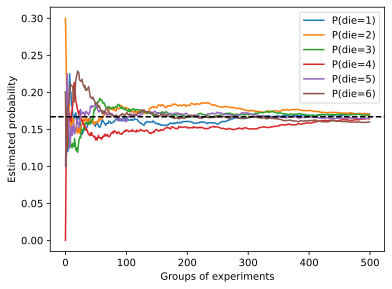

In [87]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

#### **Axioms of Probability Theory**

When dealing with the rolls of a die, we call the set S={1,2,3,4,5,6} the sample space or outcome space, where each element is an outcome. An event is a set of outcomes from a given sample space. For instance, “seeing a 5” ({5}) and “seeing an odd number” ({1,3,5}) are both valid events of rolling a die. Note that if the outcome of a random experiment is in event A, then event A has occurred. That is to say, if 3 dots faced up after rolling a die, since 3∈{1,3,5}, we can say that the event “seeing an odd number” has occurred.

Formally, probability can be thought of as a function that maps a set to a real value. The probability of an event A in the given sample space S, denoted as P(A), satisfies the following properties:

* For any event A, its probability is never negative, i.e., P(A)≥0;

* Probability of the entire sample space is 1, i.e., P(S)=1;

* For any countable sequence of events A1,A2,…
that are mutually exclusive (Ai∩Aj=∅ for all i≠j), the probability that any happens is equal to the sum of their individual probabilities, i.e., P(⋃∞i=1Ai)=∑∞i=1P(Ai).

#### **Random Variables**

In our random experiment of casting a die, we introduced the notion of a random variable. A random variable can be pretty much any quantity and is not deterministic. It could take one value among a set of possibilities in a random experiment. Consider a random variable X whose value is in the sample space S={1,2,3,4,5,6} of rolling a die. We can denote the event “seeing a 5” as {X=5} or X=5, and its probability as P({X=5}) or P(X=5). By P(X=a), we make a distinction between the random variable X and the values (e.g., a) that X can take. However, such pedantry results in a cumbersome notation. For a compact notation, on one hand, we can just denote P(X) as the distribution over the random variable X: the distribution tells us the probability that X takes any value. On the other hand, we can simply write P(a) to denote the probability that a random variable takes the value a. Since an event in probability theory is a set of outcomes from the sample space, we can specify a range of values for a random variable to take. For example, P(1≤X≤3) denotes the probability of the event {1≤X≤3}, which means {X=1,2,or,3}. Equivalently, P(1≤X≤3) represents the probability that the random variable X can take a value from {1,2,3}.

### **Dealing with Multiple Random Variables**

Very often, we will want to consider more than one random variable at a time. For instance, we may want to model the relationship between diseases and symptoms. Given a disease and a symptom, say “flu” and “cough”, either may or may not occur in a patient with some probability. While we hope that the probability of both would be close to zero, we may want to estimate these probabilities and their relationships to each other so that we may apply our inferences to effect better medical care.

As a more complicated example, images contain millions of pixels, thus millions of random variables. And in many cases images will come with a label, identifying objects in the image. We can also think of the label as a random variable. We can even think of all the metadata as random variables such as location, time, aperture, focal length, ISO, focus distance, and camera type. All of these are random variables that occur jointly. When we deal with multiple random variables, there are several quantities of interest.

### **Expectation and Variance**

To summarize key characteristics of probability distributions, we need some measures. The expectation (or average) of the random variable X

is denoted as
E[X]=∑xxP(X=x).

When the input of a function f(x)
is a random variable drawn from the distribution P with different values x, the expectation of f(x)

is computed as
Ex∼P[f(x)]=∑xf(x)P(x).

In many cases we want to measure by how much the random variable X

deviates from its expectation. This can be quantified by the variance
Var[X]=E[(X−E[X])2]=E[X2]−E[X]2.

Its square root is called the standard deviation. The variance of a function of a random variable measures by how much the function deviates from the expectation of the function, as different values x

of the random variable are sampled from its distribution:
Var[f(x)]=E[(f(x)−E[f(x)])2].

### **Summary**

* We can sample from probability distributions.

* We can analyze multiple random variables using joint distribution, conditional distribution, Bayes’ theorem, marginalization, and independence assumptions.

* Expectation and variance offer useful measures to summarize key characteristics of probability distributions

## **Documentation**

Due to constraints on the length of this book, we cannot possibly introduce every single PyTorch function and class (and you probably would not want us to). The API documentation and additional tutorials and examples provide plenty of documentation beyond the book. In this section we provide you with some guidance to exploring the PyTorch API.

### **Finding All the Functions and Classes in a Module**

n order to know which functions and classes can be called in a module, we invoke the dir function. For instance, we can query all properties in the module for generating random numbers:

In [88]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__'

Generally, we can ignore functions that start and end with __ (special objects in Python) or functions that start with a single _(usually internal functions). Based on the remaining function or attribute names, we might hazard a guess that this module offers various methods for generating random numbers, including sampling from the uniform distribution (uniform), normal distribution (normal), and multinomial distribution (multinomial).

### **Finding the Usage of Specific Functions and Classes**

For more specific instructions on how to use a given function or class, we can invoke the help function. As an example, let us explore the usage instructions for tensors’ ones function.

In [89]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur

From the documentation, we can see that the ones function creates a new tensor with the specified shape and sets all the elements to the value of 1. Whenever possible, you should run a quick test to confirm your interpretation:

In [90]:
torch.ones(4)

tensor([1., 1., 1., 1.])

n the Jupyter notebook, we can use ? to display the document in another window. For example, list? will create content that is almost identical to help(list), displaying it in a new browser window. In addition, if we use two question marks, such as list??, the Python code implementing the function will also be displayed.

### **Summary**

* The official documentation provides plenty of descriptions and examples that are beyond this book.

* We can look up documentation for the usage of an API by calling the dir and help functions, or ? and ?? in Jupyter notebooks